In [1]:
import keras
from keras.models import Sequential  
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.callbacks import EarlyStopping, CSVLogger
import math    

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(96, 14)
(94, 14)
[[  7.4  -0.3   1.7 ...,  -4.5   2.1  -0.1]
 [  6.9   0.7   3.8 ...,  -4.9   2.5  -0.3]
 [ -2.1   1.8   2.  ...,  -3.1   1.5   0.9]
 ..., 
 [ 10.5   1.5  -3.5 ...,  -5.5   0.7  -2.4]
 [  1.9  -2.2  -6.  ...,  -7.9   1.4  -3.6]
 [ 10.2   5.4  -2.4 ..., -10.8  -0.5  -5.3]]
--------------------
[[ 0.53145695  0.51398599  0.42760184 ...,  0.39869279  0.49112424
   0.42578548]
 [ 0.52317882  0.54895103  0.47511315 ...,  0.38997817  0.5005917
   0.42145178]
 [ 0.37417221  0.5874126   0.43438917 ...,  0.42919385  0.47692308
   0.44745395]
 ..., 
 [ 0.58278143  0.57692307  0.30995479 ...,  0.37690628  0.45798814
   0.37594798]
 [ 0.44039735  0.44755244  0.25339371 ...,  0.3246187   0.47455621
   0.34994581]
 [ 0.57781458  0.7132867   0.33484167 ...,  0.26143789  0.42958578
   0.31310943]]
(62, 32)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 62 samples, validate on 32 samples
Epoch 1/100
62/62 [==============================] - 0s - loss: 0.3141 - acc: 0.0161 - val_loss: 0.1450 - val_acc: 0.0000e+00
Epoch 2/100
62/62 [==============================] - 0s - loss: 0.1209 - acc: 0.0161 - val_loss: 0.0442 - val_acc: 0.0000e+00
Epoch 3/100
62/62 [==============================] - 0s - loss: 0.0770 - acc: 0.0000e+00 - val_loss: 0.0369 - val_acc: 0.0000e+00
Epoch 4/100
62/62 [==============================] - 0s - loss: 0.0658 - acc: 0.0000e+00 - val_loss: 0.0342 - val_acc: 0.0000e+00
Epoch 5/100
62/62 [==============================] - 0s - loss: 0.0567 - acc: 0.0161 - val_loss: 0.0315 - val_acc: 0.0000e+00
Epoch 6/100
62/62 [==============================] - 0s - loss: 0.0491 - acc: 0.0161 - val_loss: 0.0298 - val_acc: 0.0000e+00
Epoch 7/100
62/62 [==============================] - 0s - loss: 0.0428 - acc: 0.0161 - val_loss: 0.0284 - val_acc: 0.0000e+00
Epoch 8/100
62/62 [==============================] - 0s - loss: 0.

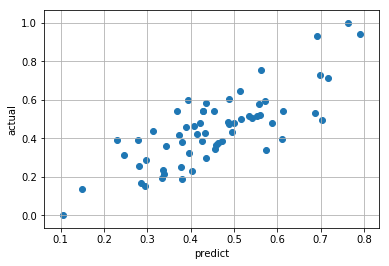

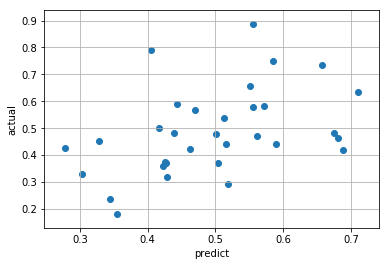

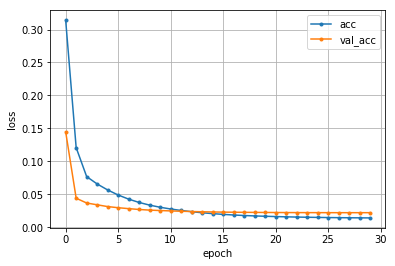

In [6]:
dataframe = pd.read_csv("./TrainingSet.csv")
print dataframe.shape
dataframe = dataframe.dropna()
print dataframe.shape
dataframe.head()

dataframe.drop(["YYYYMM"],axis=1,inplace=True)
dataset = dataframe.values
print dataset
dataset = dataset.astype("float32")
dataset = minmax_scale(dataset)
print "-"*20
print dataset

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

def split_xy(dataset):
    dataX = dataset[:,1:]
    dataY = dataset[:,0]
    return np.array(dataX),np.array([dataY]).T
trainX, trainY = split_xy(train)
testX,testY = split_xy(test)

hidden_neurons = 20
in_out_neurons = 1
epochs = 100
batch_size = 3

def FCNN(hidden_neurons=20):
    model = Sequential()
    model.add(Dense(hidden_neurons,input_dim=12))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=1))
    model.add(Activation("linear"))
    return model

model = FCNN()
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Plot
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_fcnn.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_fcnn.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.savefig("loss_fcnn.png")

#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 62 samples, validate on 32 samples
Epoch 1/30
62/62 [==============================] - 0s - loss: 0.1296 - acc: 0.0000e+00 - val_loss: 0.0739 - val_acc: 0.0000e+00
Epoch 2/30
62/62 [==============================] - 0s - loss: 0.0739 - acc: 0.0000e+00 - val_loss: 0.0679 - val_acc: 0.0000e+00
Epoch 3/30
62/62 [==============================] - 0s - loss: 0.0634 - acc: 0.0000e+00 - val_loss: 0.0559 - val_acc: 0.0000e+00
Epoch 4/30
62/62 [==============================] - 0s - loss: 0.0543 - acc: 0.0000e+00 - val_loss: 0.0503 - val_acc: 0.0000e+00
Epoch 5/30
62/62 [==============================] - 0s - loss: 0.0466 - acc: 0.0000e+00 - val_loss: 0.0460 - val_acc: 0.0000e+00
Epoch 6/30
62/62 [==============================] - 0s - loss: 0.0406 - acc: 0.0161 - val_loss: 0.0429 - val_acc: 0.0000e+00
Epoch 7/30
62/62 [==============================] - 0s - loss: 0.0360 - acc: 0.0161 - val_loss: 0.0407 - val_acc: 0.0000e+00
Epoch 8/30
62/62 [==============================] - 0s - loss

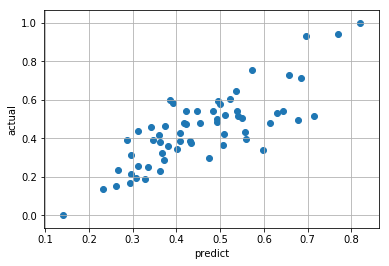

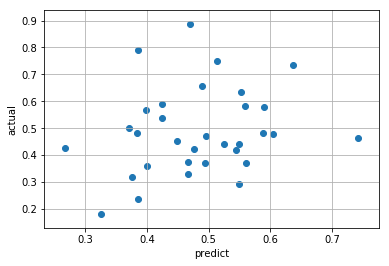

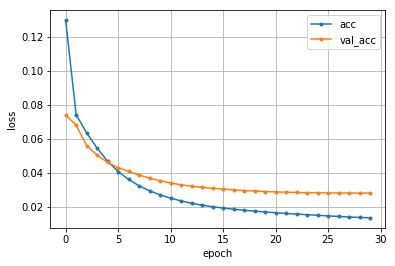

In [14]:
model = FCNN(30)
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Plot
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_fcnn.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_fcnn.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.savefig("loss_fcnn_2.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 62 samples, validate on 32 samples
Epoch 1/30
62/62 [==============================] - 0s - loss: 0.3027 - acc: 0.0161 - val_loss: 0.0586 - val_acc: 0.0000e+00
Epoch 2/30
62/62 [==============================] - 0s - loss: 0.1023 - acc: 0.0161 - val_loss: 0.0294 - val_acc: 0.0000e+00
Epoch 3/30
62/62 [==============================] - 0s - loss: 0.0528 - acc: 0.0323 - val_loss: 0.0287 - val_acc: 0.0000e+00
Epoch 4/30
62/62 [==============================] - 0s - loss: 0.0395 - acc: 0.0323 - val_loss: 0.0221 - val_acc: 0.0000e+00
Epoch 5/30
62/62 [==============================] - 0s - loss: 0.0265 - acc: 0.0323 - val_loss: 0.0216 - val_acc: 0.0000e+00
Epoch 6/30
62/62 [==============================] - 0s - loss: 0.0209 - acc: 0.0323 - val_loss: 0.0220 - val_acc: 0.0000e+00
Epoch 7/30
62/62 [==============================] - 0s - loss: 0.0180 - acc: 0.0323 - val_loss: 0.0227 - val_acc: 0.0000e+00
Epoch 8/30
62/62 [==============================] - 0s - loss: 0.0168 - acc: 0.03

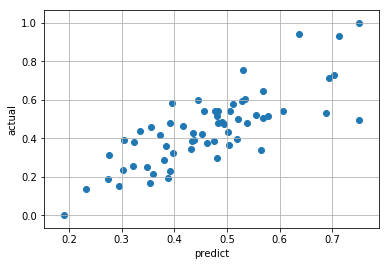

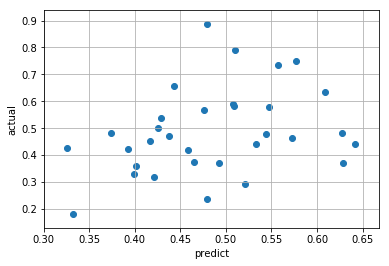

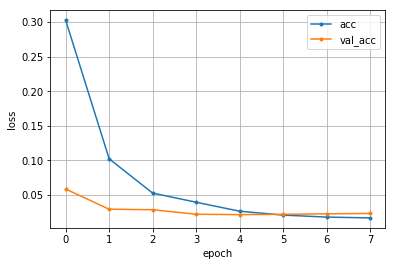

In [15]:
model = FCNN(100)
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Plot
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_fcnn.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_fcnn.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.savefig("loss_fcnn_3.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 62 samples, validate on 32 samples
Epoch 1/8
62/62 [==============================] - 0s - loss: 0.1369 - acc: 0.0161 - val_loss: 0.0254 - val_acc: 0.0000e+00
Epoch 2/8
62/62 [==============================] - 0s - loss: 0.0651 - acc: 0.0161 - val_loss: 0.0263 - val_acc: 0.0000e+00
Epoch 3/8
62/62 [==============================] - 0s - loss: 0.0248 - acc: 0.0323 - val_loss: 0.0237 - val_acc: 0.0000e+00
Epoch 4/8
62/62 [==============================] - 0s - loss: 0.0236 - acc: 0.0323 - val_loss: 0.0254 - val_acc: 0.0000e+00
Epoch 5/8
62/62 [==============================] - 0s - loss: 0.0197 - acc: 0.0323 - val_loss: 0.0236 - val_acc: 0.0000e+00
Epoch 6/8
62/62 [==============================] - 0s - loss: 0.0174 - acc: 0.0323 - val_loss: 0.0230 - val_acc: 0.0000e+00
Epoch 7/8
62/62 [==============================] - 0s - loss: 0.0164 - acc: 0.0323 - val_loss: 0.0230 - val_acc: 0.0000e+00
Epoch 8/8
62/62 [==============================] - 0s - loss: 0.0155 - acc: 0.0323 - val

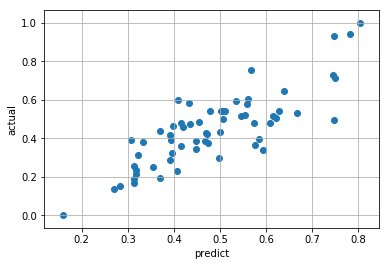

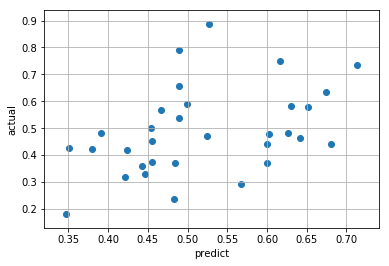

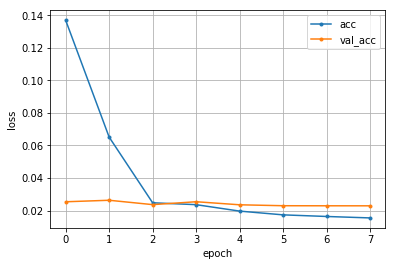

In [16]:
model = FCNN(300)
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Plot
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_fcnn.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_fcnn.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.savefig("loss_fcnn.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if __name__ == '__main__':


Train on 62 samples, validate on 32 samples
Epoch 1/8
62/62 [==============================] - 0s - loss: 0.1321 - acc: 0.0161 - val_loss: 0.0289 - val_acc: 0.0000e+00
Epoch 2/8
62/62 [==============================] - 0s - loss: 0.0485 - acc: 0.0161 - val_loss: 0.0222 - val_acc: 0.0000e+00
Epoch 3/8
62/62 [==============================] - 0s - loss: 0.0212 - acc: 0.0323 - val_loss: 0.0228 - val_acc: 0.0000e+00
Epoch 4/8
62/62 [==============================] - 0s - loss: 0.0211 - acc: 0.0323 - val_loss: 0.0246 - val_acc: 0.0000e+00
Epoch 5/8
62/62 [==============================] - 0s - loss: 0.0197 - acc: 0.0323 - val_loss: 0.0240 - val_acc: 0.0000e+00
('test score:', 0.024044766949373297)
('test accuracy:', 0.0)


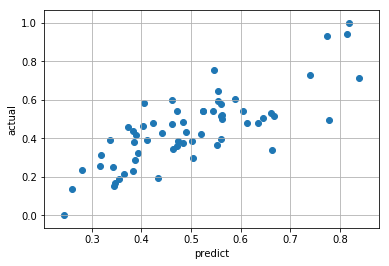

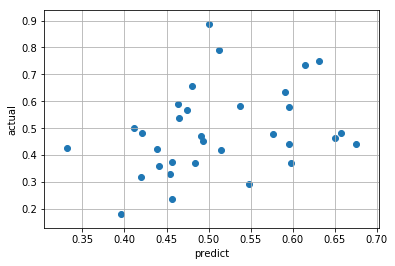

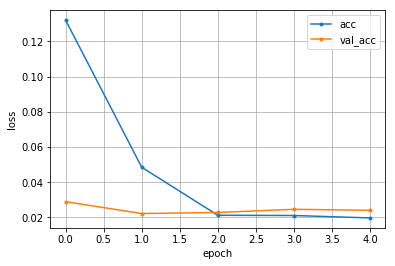

In [17]:
def FCNN(hidden_neurons_1=100,hidden_neurons_2=100,hidden_neurons_3=100):
    model = Sequential()
    model.add(Dense(hidden_neurons_1,input_dim=12))
    model.add(Activation("relu"))
    model.add(Dense(hidden_neurons_2))
    model.add(Activation("relu"))
    model.add(Dense(hidden_neurons_3))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=1))
    model.add(Activation("linear"))
    return model

model = FCNN()
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#Plot
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_fcnn.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_fcnn.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.savefig("loss_fcnn.png")

--------------------
[[ 0.53145695  0.51398599  0.42760184 ...,  0.39869279  0.49112424
   0.42578548]
 [ 0.52317882  0.54895103  0.47511315 ...,  0.38997817  0.5005917
   0.42145178]
 [ 0.37417221  0.5874126   0.43438917 ...,  0.42919385  0.47692308
   0.44745395]
 ..., 
 [ 0.58278143  0.57692307  0.30995479 ...,  0.37690628  0.45798814
   0.37594798]
 [ 0.44039735  0.44755244  0.25339371 ...,  0.3246187   0.47455621
   0.34994581]
 [ 0.57781458  0.7132867   0.33484167 ...,  0.26143789  0.42958578
   0.31310943]]
(62, 32)


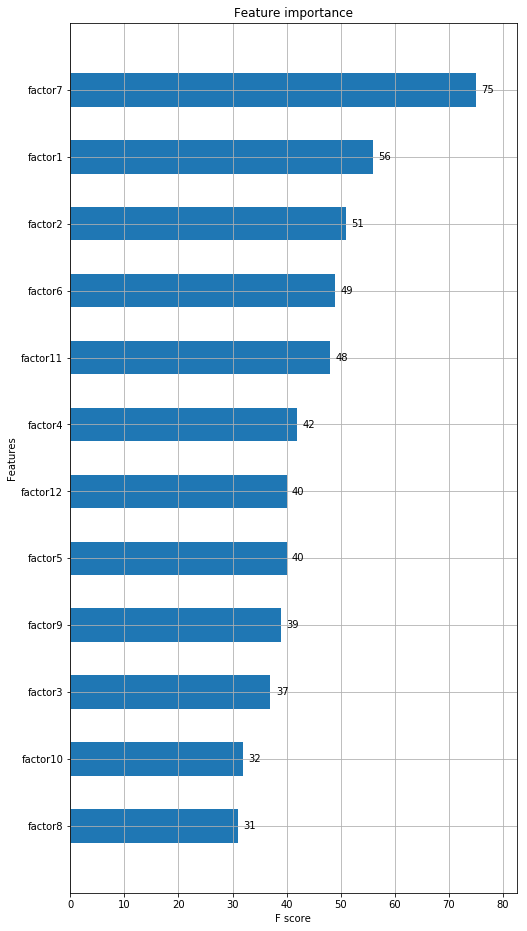

In [46]:
import xgboost as xgb

dataframe = pd.read_csv("./TrainingSet.csv")
dataframe = dataframe.dropna()

dataframe.drop(["YYYYMM"],axis=1,inplace=True)
dataset = dataframe.values
df_columns = dataframe.columns
dataset = dataset.astype("float32")
dataset = minmax_scale(dataset)
print "-"*20
print dataset



train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

def split_xy(dataset):
    dataX = dataset[:,1:]
    dataY = dataset[:,0]
    return np.array(dataX),np.array([dataY]).T
trainX, trainY = split_xy(train)
testX,testY = split_xy(test)


xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:logistic',
    'eval_metric': 'rmse',
    'silent': 1
   
}

df_columns =  df_columns[1:]

dtrain = xgb.DMatrix(trainX, trainY, feature_names=df_columns)
dtest = xgb.DMatrix(testX, feature_names=df_columns)

num_boost_round = 100

model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_round)

fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, height=0.5, ax=ax)

y_pred = model.predict(dtest)
y_pred = np.round(y_pred * 0.99)

[ 1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
[[ 0.23841061]
 [ 0.29304636]
 [ 0.37582782]
 [ 0.44205299]
 [ 0.3692053 ]
 [ 0.37251657]
 [ 0.63576162]
 [ 0.48344371]
 [ 0.31788081]
 [ 0.56788081]
 [ 0.79139072]
 [ 0.35927153]
 [ 0.58940399]
 [ 0.74834436]
 [ 0.5       ]
 [ 0.8874172 ]
 [ 0.4817881 ]
 [ 0.18046358]
 [ 0.53642386]
 [ 0.42715234]
 [ 0.65728474]
 [ 0.42218545]
 [ 0.41887417]
 [ 0.46357617]
 [ 0.47682118]
 [ 0.45198676]
 [ 0.32947022]
 [ 0.4718543 ]
 [ 0.73509932]
 [ 0.58278143]
 [ 0.44039735]
 [ 0.57781458]]


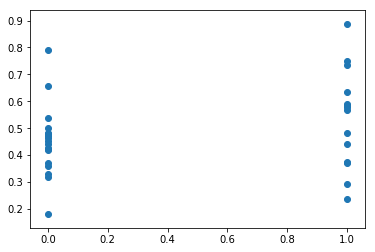

In [47]:
print y_pred
print testY
plt.scatter(y_pred,testY)
plt.show()

In [30]:
dataframe = pd.read_csv("./TrainingSet.csv")
dataframe = dataframe.dropna()
dataframe.drop(["YYYYMM"],axis=1,inplace=True)
#dataset = dataframe.values
#dataset = dataset.astype("float32")
#dataset = minmax_scale(dataframe)
dataset = dataframe
print dataset.shape
train_size = int(len(dataset) * 0.67)
print train_size
test_size = len(dataset) - train_size
train, test = dataset.loc[0:train_size,:], dataset.loc[train_size:len(dataset),:]


def _load_data(data, n_prev = 0):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

trainX,trainY = _load_data(train)
testX,testY = _load_data(test)

def Simple_LSTM(hidden_neurons=20):
    model = Sequential()
    model.add(LSTM(hidden_neurons, input_dim=12,input_length=0))
    model.add(Dense(1))
    model.add(Activation("linear"))
    return model



model = Simple_LSTM()
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(trainPredict,trainY)
plt.show()
plt.savefig("train_slstm.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.scatter(testPredict,testY)
plt.show()
plt.savefig("test_slstm.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
plt.savefig("acc_slstm.png")

(94, 13)
62


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(20, input_shape=(0, 12))`


ValueError: Error when checking input: expected lstm_8_input to have shape (None, 0, 12) but got array with shape (61, 0, 13)

In [10]:
from keras.layers.core import Dropout

def Dropout_LSTM(hidden_neurons=20):
    model = Sequential()
    model.add(LSTM(hidden_neurons, input_dim=12))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation("linear"))
    return model

model = Dropout_LSTM()
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
              
              
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.plot(trainPredict,trainY)
plt.show()
plt.savefig("train_dlstm.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.plot(testPredict,testY)
plt.show()
plt.savefig("test_dlstm.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
plt.savefig("acc_dlstm.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(20, input_shape=(None, 12))`
  """


ValueError: Error when checking input: expected lstm_4_input to have 3 dimensions, but got array with shape (62, 12)

In [8]:
def B_LSTM(hidden_neurons=20):
    model = Sequential()
    model.add(Bidirectional(LSTM(hidden_neurons,input_dim=12)))
    model.add(Activation("relu"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    return model

model = B_LSTM()
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')          
hist = model.fit(trainX,trainY,nb_epoch=epochs, batch_size=batch_size,
                    verbose=1,validation_data=(testX, testY),callbacks=[es, csv_logger],shuffle=False)
scores = model.evaluate(testX, testY, batch_size=batch_size,verbose=0)

print('test score:', scores[0])
print('test accuracy:', scores[1])

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
              
              
plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.plot(trainPredict,trainY)
plt.show()
plt.savefig("train_blstm.png")

plt.legend(loc='best')
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual")
plt.plot(testPredict,testY)
plt.show()
plt.savefig("test_blstm.png")

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
plt.savefig("acc_blstm.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(20, input_shape=(None, 12))`
  """


ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (62, 12)